In [1]:
#include necessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [2]:
class HashFunc:
    def __init__(self, m):
        self.m = m
    def hash(self,x): 
        return
class MersenneHashFunc(HashFunc): 
    def __init__(self, N, mersenne_prime, m): 
        super().__init__(m)
        self.N = N #N is the universe size, while m is the size of the hash table
        self.m = m
        self.mersenne_prime = mersenne_prime
        self.a = random.randint(1, self.mersenne_prime - 1)
        self.b = random.randint(1, self.mersenne_prime - 1)
        return
    def hash(self, x): 
        return ((self.a * int(x) + self.b) % self.mersenne_prime) % self.m

class RandomHashFunc(HashFunc): 
    def __init__(self, N, m): 
        super().__init__(m)
        self.N = N
        self.seed = random.randint(1, self.N)
        return
    def hash(self, x): 
        random.seed(self.seed + x)
        value = random.randint(0, self.m - 1)
        return value

In [3]:
class BloomFilter: 
    def __init__(self, N, m, k, is_mersenne, mersenne_prime = 2**31 - 1): 
        self.m = m
        self.k = k
        self.N = N
        self.is_mersenne = is_mersenne
        self.mersenne_prime = mersenne_prime
        self.hashfuncs = []
        self.filter = np.zeros(m)

        if(is_mersenne == True): 
            for i in range (0, k):
                self.hashfuncs.append(MersenneHashFunc(N, mersenne_prime, m))
        else: 
            for i in range (0, k): 
                self.hashfuncs.append(RandomHashFunc(N, m))
    def insert(self, x): 
        for i in range (0, self.k): 
            index = self.hashfuncs[i].hash(x)
            self.filter[int(index)] = 1
    def contains(self, x): 
        for i in range (0, self.k): 
            #the bloom filter will call the hash function dependent on if it is a mersenne hash or a random hash
            index = self.hashfuncs[i].hash(x) 
            if(self.filter[index] == 0):
                return False
        return True

In [335]:
def value_mapping (N, n, c, k, is_random, is_mersenne, mersenne_prime = 2 ** 31 - 1): 
    m = n * c
    hashfuncs = []
    x = np.empty (n * k)
    y = np.empty (n * k)
    if(is_mersenne == True): 
        hashtype = 'Mersenne'
        for i in range (k): 
            hashfuncs.append(MersenneHashFunc(N, mersenne_prime, m))
    else: 
        hashtype = 'Random'
        for i in range(k):
            hashfuncs.append(RandomHashFunc(N, m)) 
    for i in range (0, n): 
        for j in range (k): 
            if is_random == True: 
                datatype = 'Random'
                rand = random.randint(0, N)
                x[i*k + j] = rand
            else: 
                datatype = 'Correlated'
                value = int(N/n) * i
                x[i*k + j] = value
            bin = hashfuncs[j].hash(x[i])
            y[i * k + j] = bin
    
    return x, y
    
   

In [449]:
def plot_value_mapping (N, n, c, k, is_random, mersenne_prime = 2 ** 31 - 1):
    if (is_random): 
        datatype = 'Random'
        
    else: 
        datatype = 'Correlated'

    
    x, mersenne_y = value_mapping (N, n, c, k, is_random = is_random, is_mersenne = True, mersenne_prime = mersenne_prime)
    x, random_y   = value_mapping (N, n, c, k, is_random = is_random, is_mersenne = False, mersenne_prime = mersenne_prime)
        



    plt.scatter(x, mersenne_y, label = 'Mersenne Hash Function', color = 'blue')
    plt.scatter(x, random_y, label = 'Random Hash Function', color = 'green', alpha = 0.5)

    plt.xlabel('Input')
    plt.ylabel('Bin')
    plt.title ('Bin vs Input for '  + datatype + ' data with n = ' + str(n)  + ', c = ' + str(c) + ', k = ' + str(k))
    plt.legend()
    plt.show()
    

In [4]:
def get_load_data (N, n, c, k, is_random, is_mersenne, mersenne_prime = 2**31 - 1): 
    m = n * c
    hashtable = np.zeros(n * c)
    x = np.zeros(n * c)
    hashfunc = []
    for i in range (0, n * c): 
        x[i] = i
    for i in range (0, k): 
        if(is_mersenne == True): 
            hashfunc.append(MersenneHashFunc(N, mersenne_prime, m))
        else: 
            hashfunc.append(RandomHashFunc(N, m))
    if(is_random == True): 
        randomdata = {-1}
        for i in range (0, n): 
            rand = random.randint(1, N - 1)
            while (rand in randomdata):
                rand = random.randint(1, N - 1)
            randomdata.add(rand)
            for j in range (0, k): 
                index = hashfunc[j].hash(rand)
                hashtable[int(index)] = hashtable[int(index)] + 1
    elif (is_random == False): 
        increment = int(N/n)
        for i in range (0, N, increment): 
            for j in range (0, k): 
                index = hashfunc[j].hash(int(i))
                hashtable[int(index)] = hashtable[int(index)] + 1
    return x, hashtable

In [5]:
def load_max (N, n, c, k, is_random, is_mersenne, mersenne_prime = 2 ** 31 - 1): 
    x, hashtable = get_load_data(N, n, c, k, is_random = is_random, is_mersenne = is_mersenne, mersenne_prime = mersenne_prime)
    max_load = 0
    for i in range (0, len(hashtable)): 
        if(hashtable[i] > max_load): 
            max_load = hashtable[i]
    return max_load

In [6]:
def plot_load_max (N, n, c, upper_bound_k = 12, trials = 10, mersenne_prime = 2 ** 31 - 1):
    x = np.zeros(upper_bound_k)
    max_mersenne_organized_data_avg = np.zeros(upper_bound_k)
    max_mersenne_random_data_avg = np.zeros(upper_bound_k)
    max_random_organized_data_avg = np.zeros(upper_bound_k)
    max_random_random_data_avg = np.zeros(upper_bound_k)
    for i in range (1, upper_bound_k):
        x[i - 1] = i
        for j in range (0, trials): 
            mersenne_organized_data_max = load_max(N, n, c, i, is_random = False, is_mersenne = True, mersenne_prime = mersenne_prime)
            mersenne_random_data_max = load_max(N, n, c, i, is_random = True, is_mersenne = True, mersenne_prime = mersenne_prime)
            random_organized_data_max = load_max(N, n, c, i, is_random = False, is_mersenne = False, mersenne_prime = mersenne_prime)
            random_random_data_max = load_max(N, n, c, i, is_random = True, is_mersenne = False, mersenne_prime = mersenne_prime)
            max_mersenne_organized_data_avg[i] += mersenne_organized_data_max
            max_mersenne_random_data_avg[i] += mersenne_random_data_max
            max_random_organized_data_avg[i] += random_organized_data_max
            max_random_random_data_avg[i] += random_random_data_max
        max_mersenne_organized_data_avg[i] /= trials
        max_mersenne_random_data_avg[i] /= trials
        max_random_organized_data_avg[i] /= trials
        max_random_random_data_avg[i] /= trials
    x[upper_bound_k - 1] = upper_bound_k
    
    plt.scatter(x,max_mersenne_organized_data_avg, color = 'blue', label = 'Mersenne Hash, Correlated Data', alpha = 0.5)
    plt.scatter(x,max_mersenne_random_data_avg, color = 'orange', label = 'Mersenne Hash, Random Data', alpha = 0.5)
    plt.scatter(x,max_random_organized_data_avg, color = 'green', label = 'Random Hash, Correlated Data', alpha = 0.5)
    plt.scatter(x,max_random_random_data_avg, color = 'red', label = 'Random Hash, Random Data', alpha = 0.5)
    plt.plot(x,max_mersenne_organized_data_avg, color = 'blue', alpha = 0.5)
    plt.plot(x,max_mersenne_random_data_avg, color = 'orange',  alpha = 0.5)
    plt.plot(x,max_random_organized_data_avg, color = 'green',  alpha = 0.5)
    plt.plot(x,max_random_random_data_avg, color = 'red',alpha = 0.5)
    plt.xlabel('K')
    plt.ylabel('Maximum Load (Averaged over 10 trials)')
    plt.legend()
    plt.title('Maximum Load by Hash Function with n = ' + str(n) + ', c = ' + str(c))
    plt.show()


In [7]:
def plot_load_per_bin(N, n, c, k, is_random, is_mersenne, mersenne_prime = 2**31 - 1): 
    x, hashtable = get_load_data(N, n, c, k, is_random = is_random, is_mersenne = is_mersenne, mersenne_prime = mersenne_prime)
    if(is_mersenne): 
        hashfunctype = "Mersenne"
    else: 
        hashfunctype = "Random"
    if(is_random): 
        datatype = "Random"
    else: 
        datatype = "Correlated"
        
    plt.scatter(x, hashtable)
    
    
    plt.xlabel('Bin')
    plt.ylabel('Load')

    plt.title(hashfunctype + ' Hash Function with n = ' +  str(n) + ', c = '  + str(c) + ', k = ' +str(k) +  ' with ' + datatype + ' data')
    
    plt.show()


In [8]:
def bins_per_load(N, n, c, k, is_random, is_mersenne, mersenne_prime = 2**31 - 1): 
    x, hashtable = get_load_data(N, n, c, k, is_random = is_random, is_mersenne = is_mersenne, mersenne_prime = mersenne_prime)
   
    maxload = 0
    for i in range (0, len(hashtable)):
        if(hashtable[i] > maxload): 
            maxload = hashtable[i]
    loads = np.zeros(int(maxload + 1))
    for i in range (0, int(maxload + 1)): 
        loads[i] = i
    binsperload = np.zeros(int(maxload + 1))
    for i in range (0, len(hashtable)): 
        binsperload[int(hashtable[i])] = binsperload[int(hashtable[i])] + 1

    return loads,binsperload

In [9]:
def plot_bins_per_load(N, n, c, k, is_random, is_mersenne, mersenne_prime = 2**31 - 1): 
    loads,binsperload = bins_per_load(N, n, c, k, is_random = is_random, is_mersenne = is_mersenne, mersenne_prime = mersenne_prime)
    
    if(is_mersenne): 
        hashfunctype = "Mersenne"
    else: 
        hashfunctype = "Random"
    if(is_random): 
        datatype = "Correlated"
    else: 
        datatype = "Organized"
        
    plt.scatter(loads, binsperload)
    
    
    plt.xlabel('Load')
    plt.ylabel('Bins')

    plt.title(hashfunctype + ' Hash Function with n = ' +  str(n) + ', c = '  + str(c) + ', k = ' +str(k) +  ' with ' + datatype + ' data')
    
    plt.show()


In [10]:
def median_bin_occupied_rate (N, n, c, is_random, is_mersenne,upper_bound_k = 12, trials = 10, mersenne_prime = 2**31 - 1): 
    bin_occupied_rate = np.zeros(trials)
    median_bin_occupied_rate = np.zeros(upper_bound_k - 1)
    
    for k in range (1, upper_bound_k):
        for i in range (0, trials): 
            loads,binsperload = bins_per_load(N, n, c, k, is_random = is_random, is_mersenne = is_mersenne, mersenne_prime = mersenne_prime)
            bin_occupied_rate[i] = 1 - binsperload[0] / (n * c)
        median_bin_occupied_rate[k - 1] = np.median(bin_occupied_rate)
    return median_bin_occupied_rate

In [11]:
def plot_load_stats(N, n, c, upper_bound_k = 12, trials = 10, mersenne_prime = 2**31 - 1):
    x = np.zeros(upper_bound_k - 1)
    
    for k in range (1, upper_bound_k):
        x[k-1] = k

    mersenne_hash_random_rate = median_bin_occupied_rate(N, n, c, is_random = True, is_mersenne = True, upper_bound_k = upper_bound_k, trials = trials,  mersenne_prime = mersenne_prime)
    plt.scatter(x, mersenne_hash_random_rate, label = "Mersenne Hash, Random Data", color = 'red')
    plt.plot(x, mersenne_hash_random_rate, color = 'red')

    mersenne_hash_organized_rate = median_bin_occupied_rate(N, n, c, is_random = False, is_mersenne = True,upper_bound_k = upper_bound_k, trials = trials,  mersenne_prime = mersenne_prime)
    plt.scatter(x, mersenne_hash_organized_rate, label = "Mersenne Hash, Correlated Data", color = 'orange')
    plt.plot(x, mersenne_hash_organized_rate, color = 'orange')
    
    random_hash_random_rate = median_bin_occupied_rate(N, n, c, upper_bound_k = upper_bound_k, trials = trials, is_random = True, is_mersenne = False, mersenne_prime = mersenne_prime)
    plt.scatter(x, random_hash_random_rate, label = "Random Hash, Random Data", color = 'yellow')
    plt.plot(x, random_hash_random_rate, color = 'yellow')

    random_hash_organized_rate = median_bin_occupied_rate(N, n, c, upper_bound_k = upper_bound_k, trials = trials, is_random = False, is_mersenne = False, mersenne_prime = mersenne_prime)
    plt.scatter(x, random_hash_organized_rate, label = "Random Hash, Correlated Data", color = 'green')
    plt.plot(x, random_hash_organized_rate,  color = 'green')

    
    plt.xlabel('K value')
    plt.ylabel('Median Bin Occupation Rate (over ' + str(trials) + ' trials)')

    plt.title(' Bin Occupation Rate vs K with n = ' +  str(n) + ', c = '  + str(c))
    plt.legend()
    
    plt.show()

In [12]:
def false_positive_rate (N, n, c, k, is_random, is_mersenne, mersenne_prime = 2 ** 31 - 1): 
    m = n * c
    bloomfilter = BloomFilter(N, m, k, is_mersenne = is_mersenne, mersenne_prime = mersenne_prime)
    data_hashed = {-1}
    falsepositives = 0 
    data_queried = {-1}
    # Here, we proceed by inserting n elements into the hash table, 
    # and then calling contains on n elements that are not in the hash table
    # To determine the rate, we divide by n
    if(is_random == True): 
        for i in range (0, n):  
            rand = random.randint(0, N)
            while (rand in data_hashed): 
                rand = random.randint(0, N)
            data_hashed.add(rand)
            bloomfilter.insert(int(rand))
       
    else: 
        for i in range (0, N, int(N/n)):
            bloomfilter.insert(int(i))
            data_hashed.add(i)
            
    for i in range (0, n): 
            rand = random.randint(0, N)
            while(rand in data_hashed or rand in data_queried):
                rand = random.randint(0, N)
            data_queried.add(rand)
            if(bloomfilter.contains(int(rand))): 
                falsepositives = falsepositives + 1
    return falsepositives / n    

In [13]:
def false_positive_data(N, n, c, is_random, is_mersenne, upper_bound_k = 12, trials = 10, mersenne_prime = 2**31 - 1):
    x = np.zeros(upper_bound_k)
    median_false_pos_rate = np.zeros(upper_bound_k)
    false_pos_rate = np.zeros(trials)
    min_false_positives = N
    min_false_positives_idx = 0
    for k in range (1, upper_bound_k + 1):
        x[k-1] = k
        for i in range (0, trials): 
            false_pos_rate[i] = false_positive_rate(N, n, c, k, is_random = is_random, is_mersenne = is_mersenne)
        median_false_pos_rate[k-1] = np.median(false_pos_rate)
        if(np.median(false_pos_rate) < min_false_positives): 
            min_false_positives = np.median(false_pos_rate)
            min_false_positives_idx = k

    return x, median_false_pos_rate, min_false_positives, min_false_positives_idx

def theoretical_false_positive_rate(k): 
    return (1 - math.e ** (-k/c)) ** k
    
def plot_false_positives (N, n, c,is_random, upper_bound_k = 100, trials = 10, mersenne_prime = 2**31 - 1): 
    x, mersenne_median_false_pos_rate, mersenne_min_false_positives, mersenne_min_false_positives_idx = false_positive_data(N, n, c, upper_bound_k = upper_bound_k, is_random = is_random, is_mersenne = True) 
    x, random_median_false_pos_rate, random_min_false_positives, random_min_false_positives_idx = false_positive_data(N, n, c, upper_bound_k = upper_bound_k, is_random = is_random, is_mersenne = False)
    
    plt.plot(x, mersenne_median_false_pos_rate, color = 'red', label = 'observed mersenne hash')
    plt.plot(x, random_median_false_pos_rate, color = 'blue', label = 'observed random hash')
    plt.scatter(x, mersenne_median_false_pos_rate, color = 'red')
    plt.scatter(x, random_median_false_pos_rate, color = 'blue')

   
    theoretical_min_false_positive_idx = c * math.log(2)
    theoretical_min_false_positive = theoretical_false_positive_rate(theoretical_min_false_positive_idx)

    
    plt.plot(x, theoretical_false_positive_rate(x), color = 'pink', label = 'theoretical hash')

    plt.scatter(x, theoretical_false_positive_rate(x), color = 'pink')

    
    plt.scatter(mersenne_min_false_positives_idx, mersenne_min_false_positives, color = 'orange', label = 'observed mersenne min')
    plt.scatter(random_min_false_positives_idx, random_min_false_positives, color = 'green', label = 'observed random min')
    print("Mersenne Prime: ", mersenne_prime)
    print("Universe Size:  ", N)
    print("Hash Function Type, Min k value, Min False Positive Rate")
    precision = 4
    x = round(theoretical_min_false_positive_idx, precision)
    y = round(theoretical_min_false_positive,precision)
    print(f"{"Theoretical":<20} {x:<10} {y:<7} ")
    x = round(mersenne_min_false_positives_idx, precision)
    y = round(mersenne_min_false_positives,precision)
    print(f"{"Mersenne":<20} {x:<10} {y:<7} ")
    x = round(random_min_false_positives_idx, precision)
    y = round(random_min_false_positives,precision)
    print(f"{"Random":<20} {x:<10} {y:<7} ")
    
    plt.scatter(theoretical_min_false_positive_idx, theoretical_min_false_positive, color = 'purple', label = 'theoretical min')

    if(is_random): 
        datatype = "Random"
    else: 
        datatype = "Correlated"

    
    plt.xlabel('K')
    plt.ylabel('Median False Positive Rate (with ' + str(trials) + ' trials)')
    plt.title('False Positive Rate vs K  with n = ' +  str(n) + ', c = '  + str(c) + ' with ' + datatype +' data')
    plt.legend()
    plt.show()

In [461]:
N = 2 ** 30 
mersenne_prime = 2 ** 31 - 1
n = 10000
upper_bound_k = 12
trials = 10

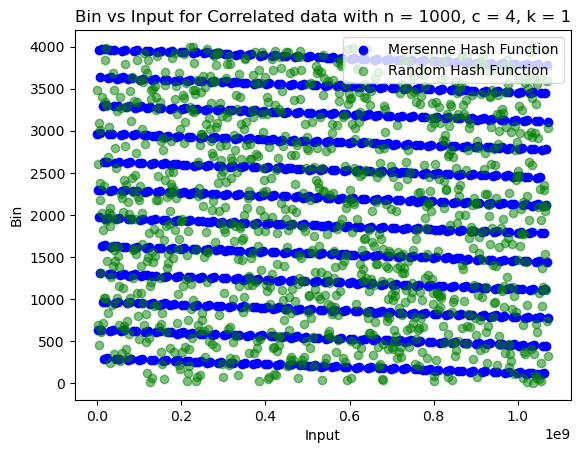

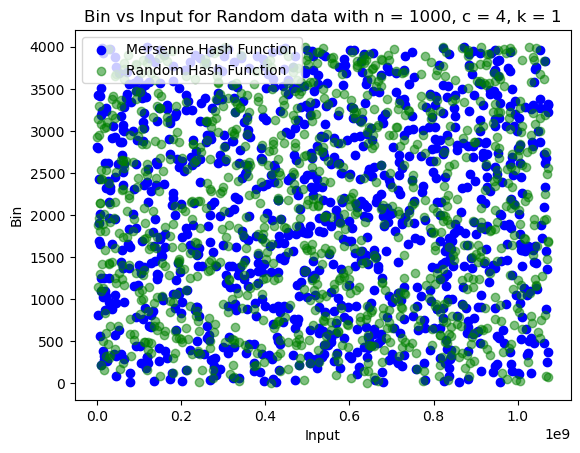

In [457]:
c = 4
k = 1

plot_value_mapping (N, n, c, k, is_random = False, mersenne_prime = 2 ** 31 - 1)
plot_value_mapping (N, n, c, k, is_random = True, mersenne_prime = 2 ** 31 - 1)

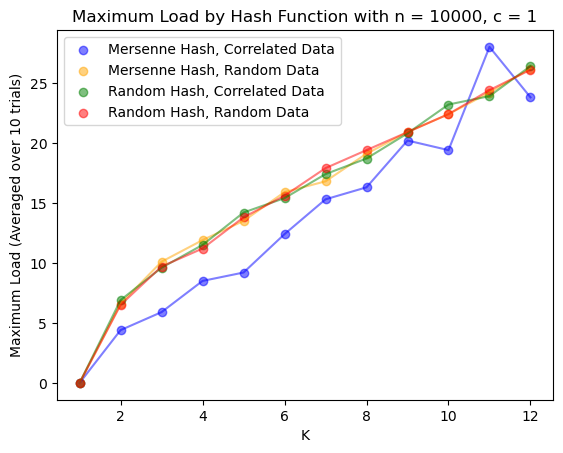

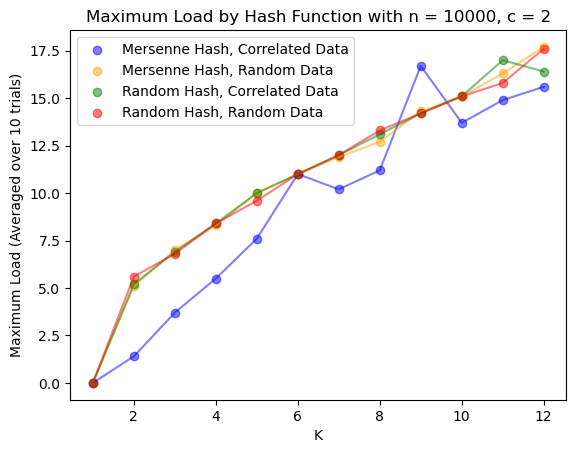

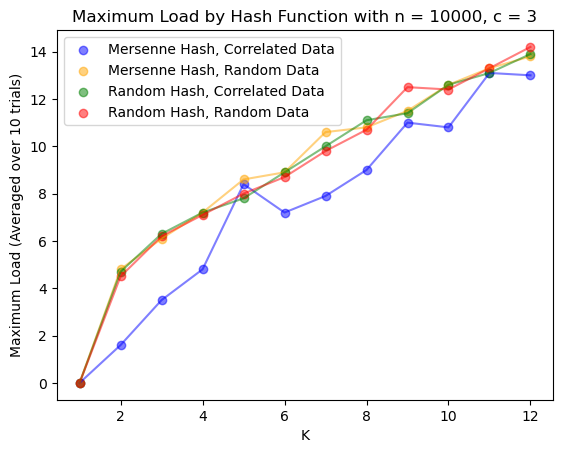

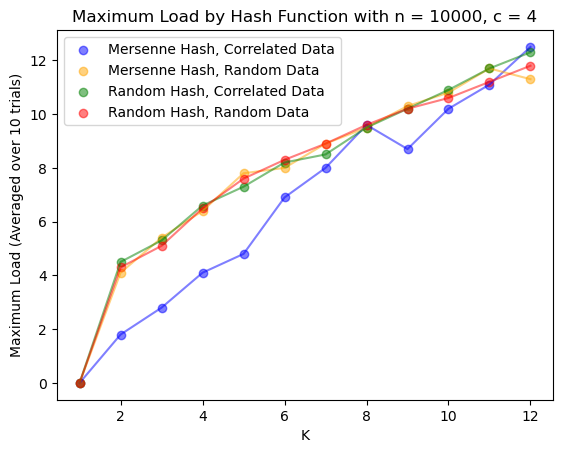

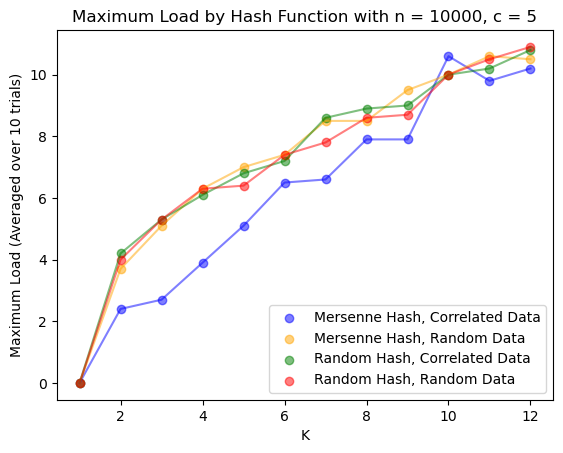

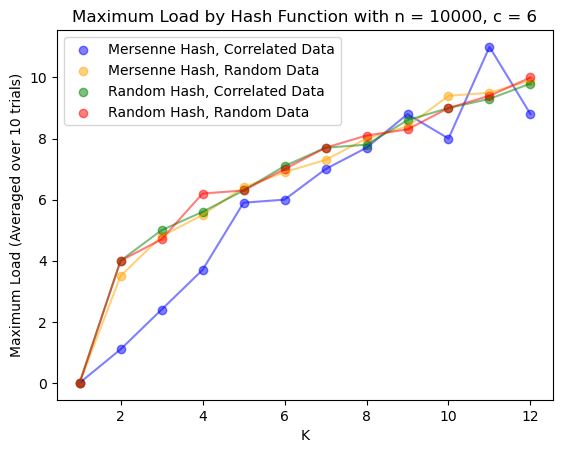

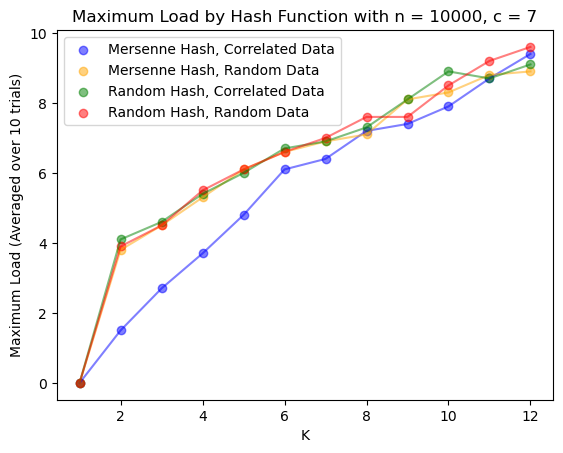

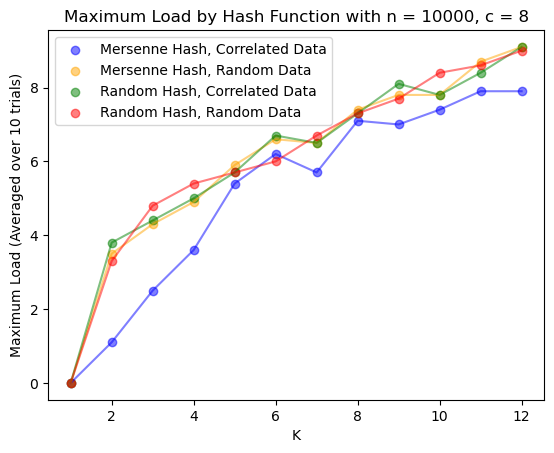

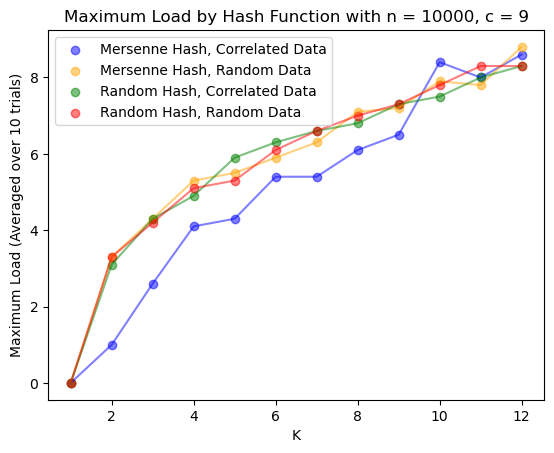

In [15]:
for c in range (1, 10): 
    plot_load_max(N, n, c, trials = 10, mersenne_prime = 2 ** 31 - 1)

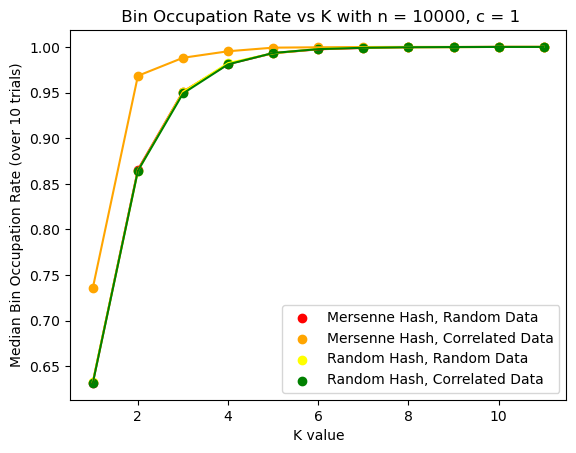

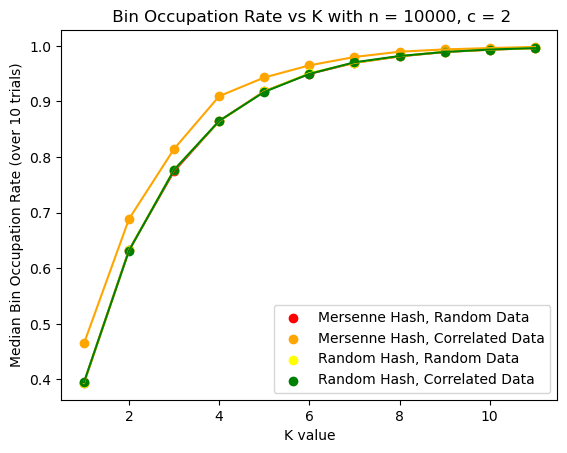

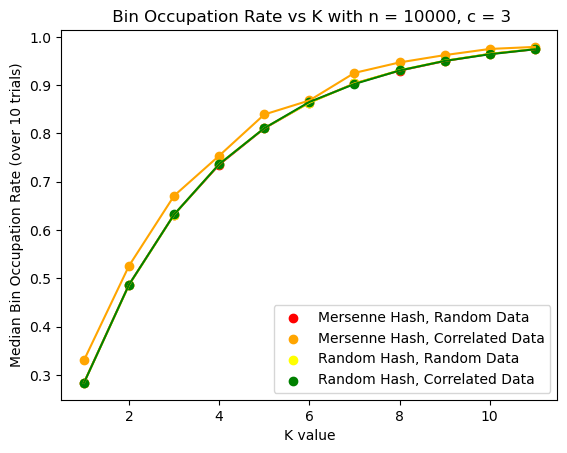

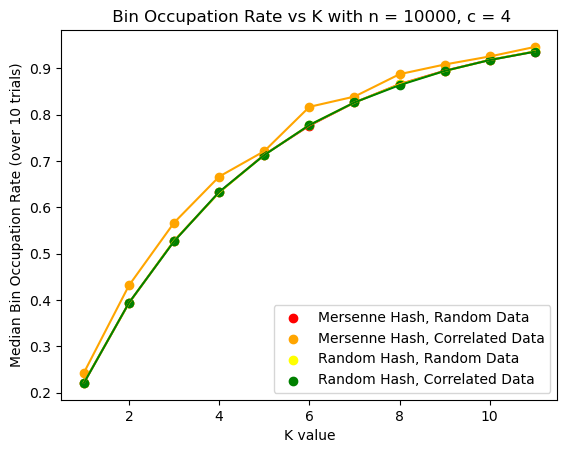

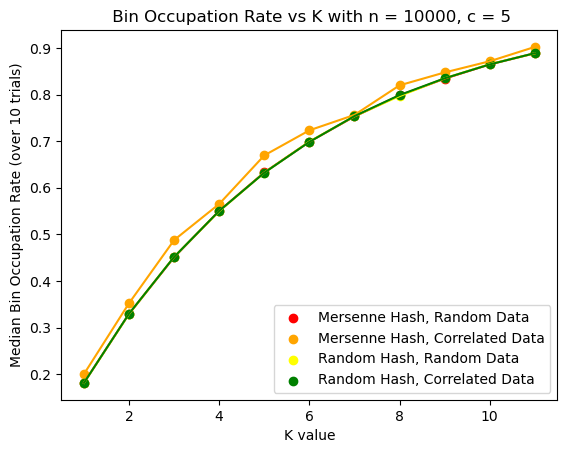

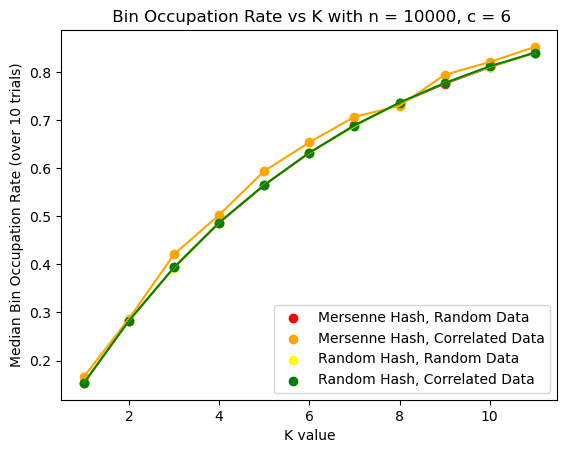

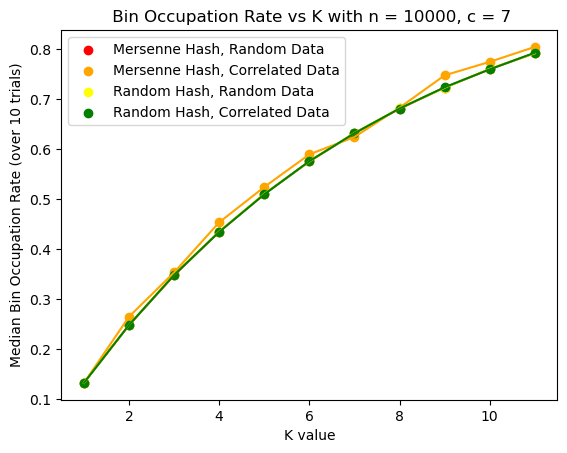

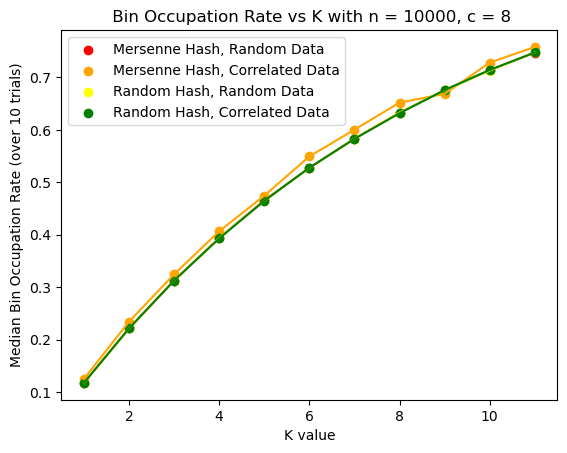

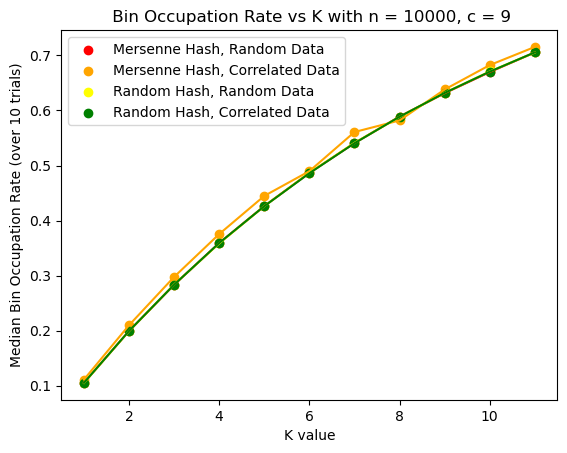

In [16]:
for c in range (1, 10): 
    plot_load_stats(N, n, c, trials = trials, upper_bound_k = upper_bound_k, mersenne_prime = mersenne_prime)

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          0.6931     0.6185  
Mersenne             1          0.6856  
Random               1          0.632   


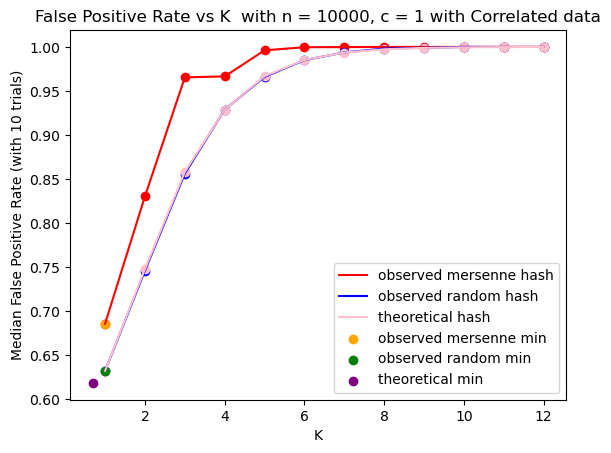

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          1.3863     0.3825  
Mersenne             1          0.459   
Random               1          0.3939  


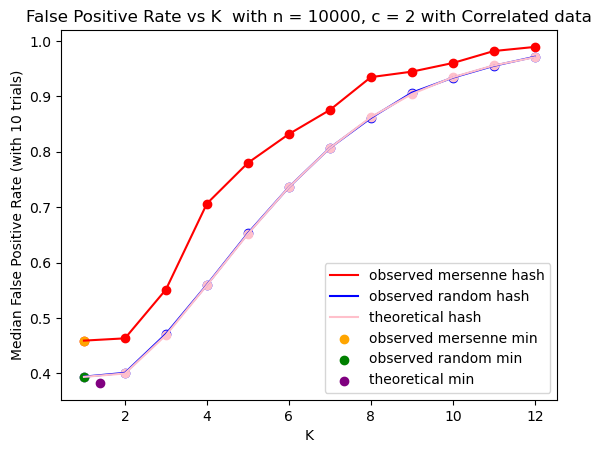

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          2.0794     0.2366  
Mersenne             2          0.2792  
Random               2          0.2382  


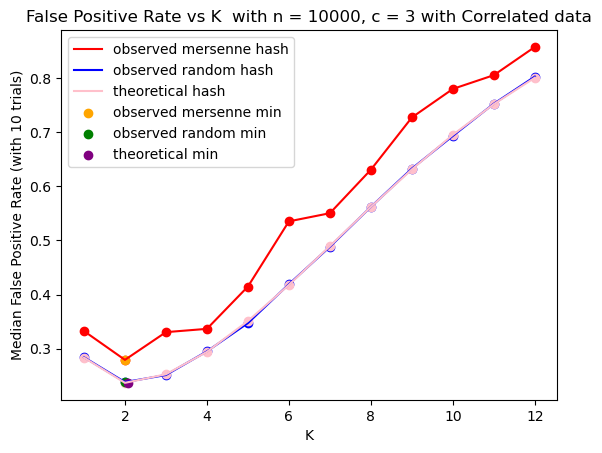

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          2.7726     0.1463  
Mersenne             3          0.1581  
Random               3          0.1488  


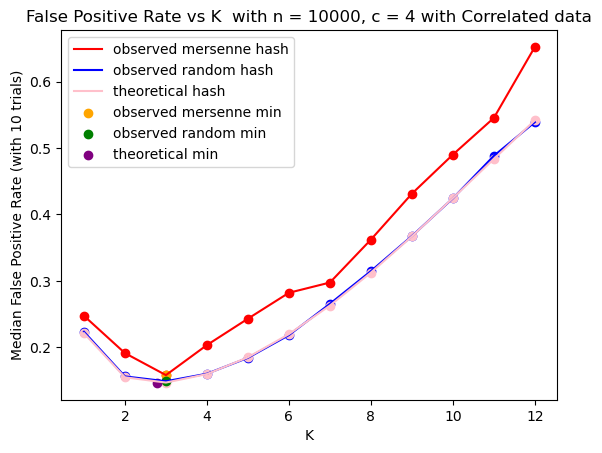

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          3.4657     0.0905  
Mersenne             3          0.1092  
Random               3          0.091   


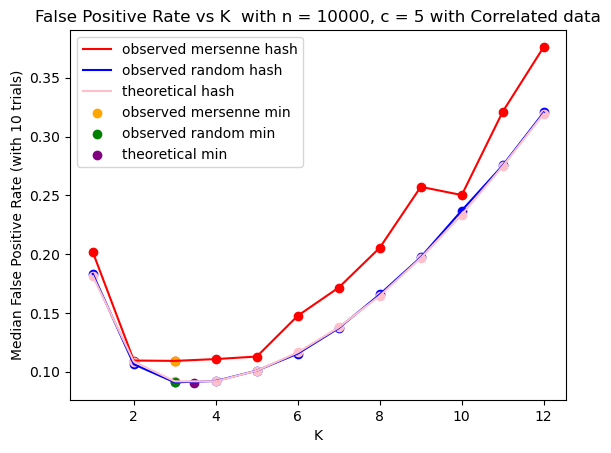

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          4.1589     0.056   
Mersenne             5          0.0596  
Random               4          0.0556  


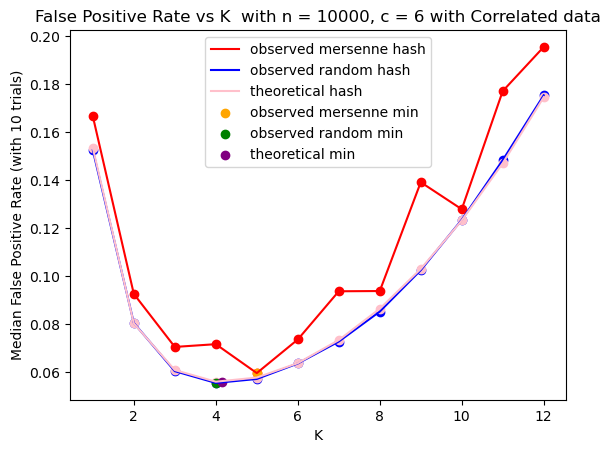

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          4.852      0.0346  
Mersenne             6          0.0403  
Random               5          0.035   


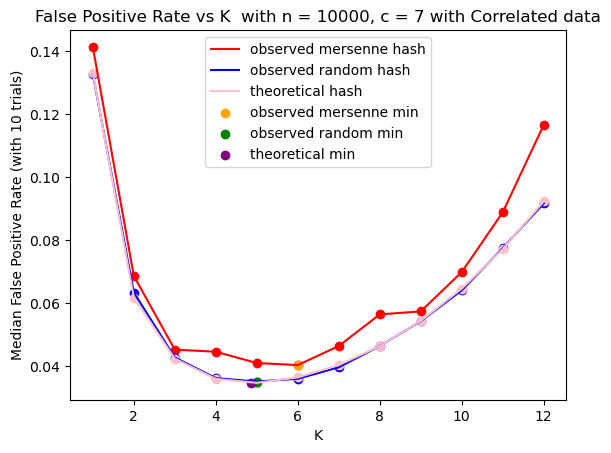

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          5.5452     0.0214  
Mersenne             7          0.0236  
Random               6          0.0214  


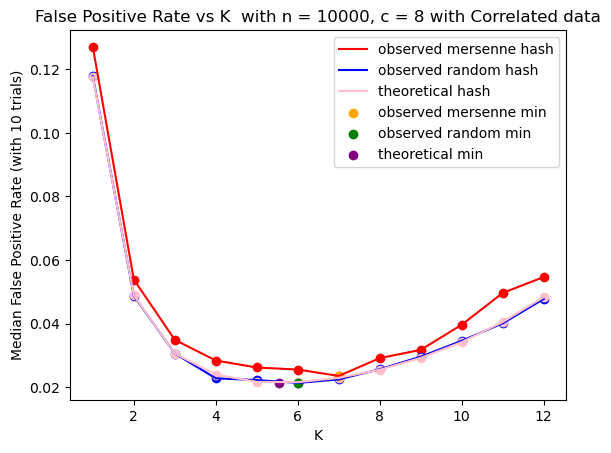

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          6.2383     0.0132  
Mersenne             6          0.0142  
Random               6          0.013   


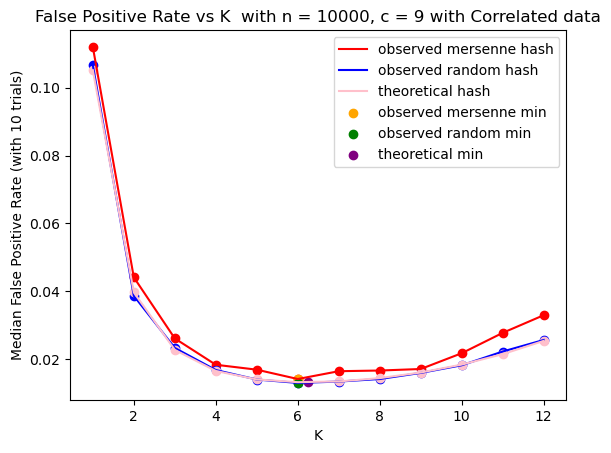

Elapsed time: 4963.531426906586 seconds


In [17]:
for c in range (1, 10): 
    plot_false_positives(N, n, c, upper_bound_k = upper_bound_k, trials = trials, is_random = False, mersenne_prime = mersenne_prime)

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          0.6931     0.6185  
Mersenne             1          0.6314  
Random               1          0.6332  


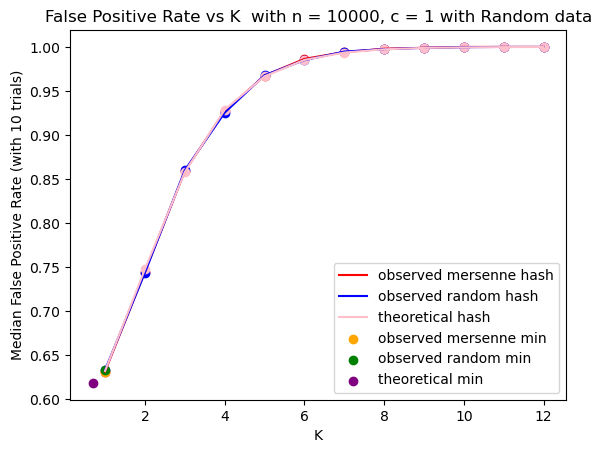

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          1.3863     0.3825  
Mersenne             1          0.3933  
Random               1          0.392   


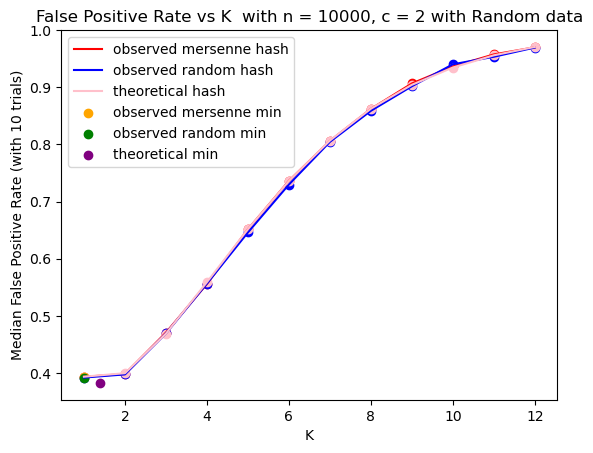

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          2.0794     0.2366  
Mersenne             2          0.2335  
Random               2          0.2354  


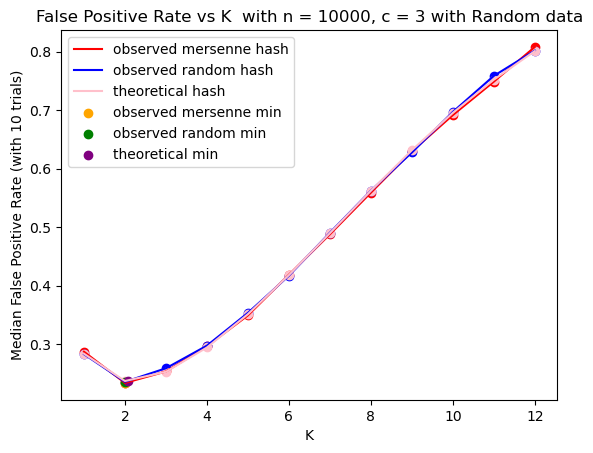

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          2.7726     0.1463  
Mersenne             3          0.1474  
Random               3          0.1461  


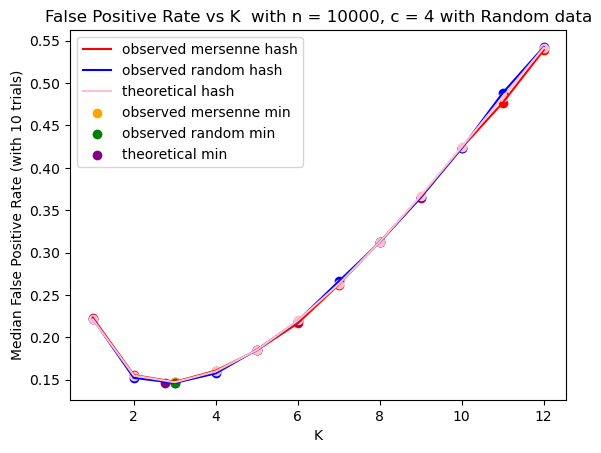

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          3.4657     0.0905  
Mersenne             4          0.09    
Random               3          0.0908  


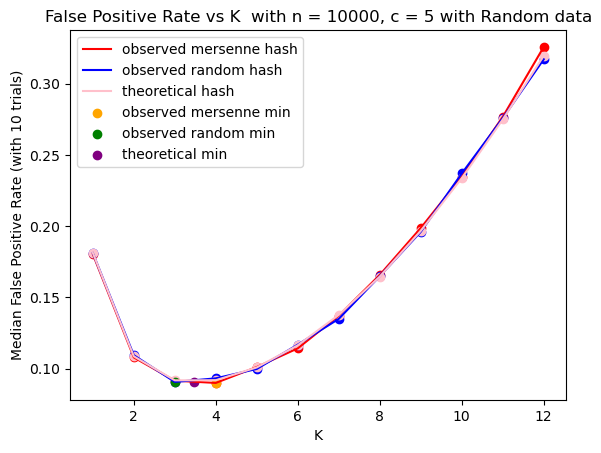

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          4.1589     0.056   
Mersenne             4          0.0572  
Random               4          0.0552  


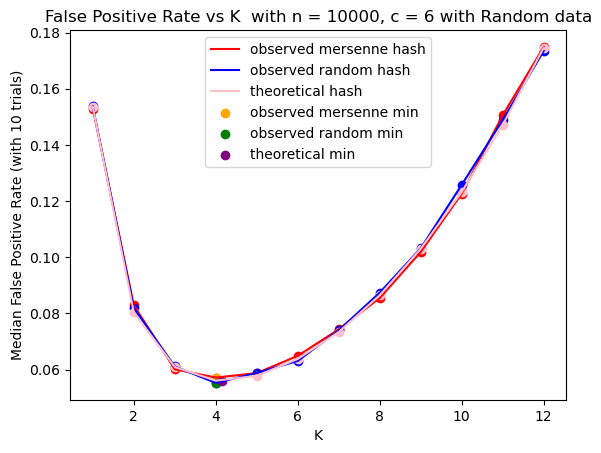

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          4.852      0.0346  
Mersenne             5          0.0344  
Random               5          0.0345  


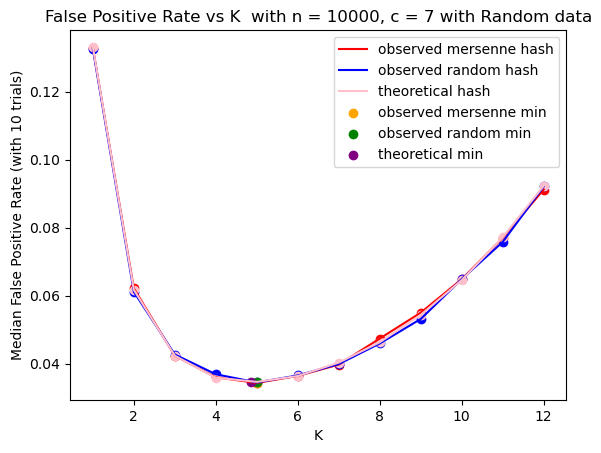

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          5.5452     0.0214  
Mersenne             5          0.0209  
Random               6          0.0211  


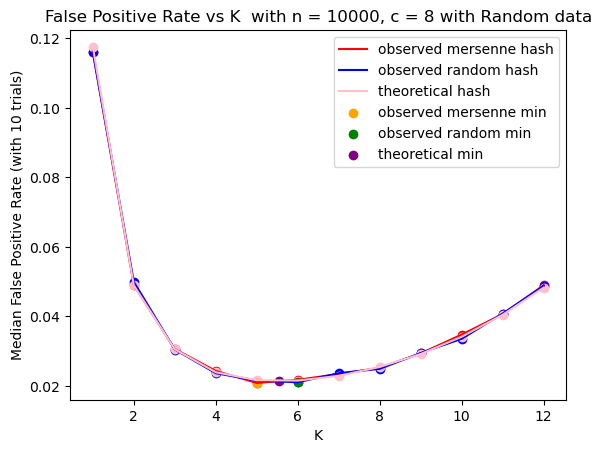

Mersenne Prime:  2147483647
Universe Size:   1073741824
Hash Function Type, Min k value, Min False Positive Rate
Theoretical          6.2383     0.0132  
Mersenne             6          0.0131  
Random               6          0.0126  


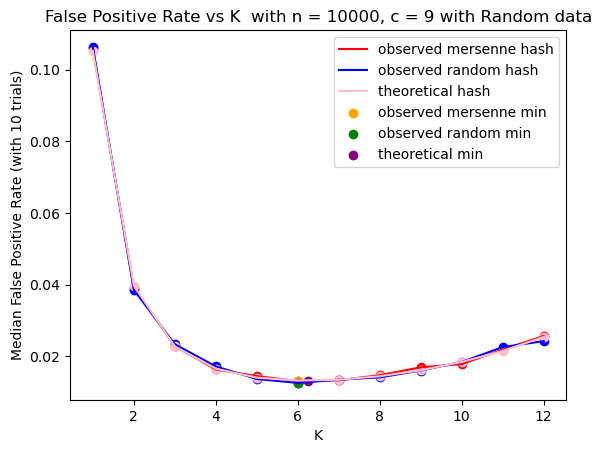

In [463]:
for c in range (1, 10): 
    plot_false_positives(N, n, c, upper_bound_k = upper_bound_k, trials = trials, is_random = True, mersenne_prime = mersenne_prime)